In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import csv
import pandas as pd
import seaborn as sns

In [3]:
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

filename = '../Data/2_firstdetections.csv'
# Load data:
firstpoints_aea = pd.read_csv(filename)

#subset = data[data["year"] == 1998]
#X = np.array([firstpoints_aea["aea_lon"], firstpoints_aea["aea_lat"]])
X = firstpoints_aea[['aea_lon', 'aea_lat']].to_numpy()
# X = X.T
#transformer = Normalizer().fit(X)  # fit does nothing.
#X = transformer.transform(X)
#X = X.T

In [ ]:
# Initialize an empty list to store dictionaries
data = []

for i in range(13000, 23001, 100):
    print("Bandwidth is : %d" % i)
    
    # Compute clustering with MeanShift

    ms = MeanShift(bandwidth=i, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print("number of estimated clusters : %d" % n_clusters_)
    
    silhouette = metrics.silhouette_score(X, labels)   
    calinski_harabasz = metrics.calinski_harabasz_score(X, labels)
    data.append({'bandwidth': i, 'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz, 'n_clusters': n_clusters_})

In [ ]:
df = pd.DataFrame(data)
df
df.to_csv('bandwidth_13000_to_23000.csv', index=False)

In [7]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
#bandwidth = estimate_bandwidth(X, quantile=0.04, n_samples=None)
#opt_bandwidth = 20200
#opt_bandwidth = 19400
#opt_bandwidth = 18600
opt_bandwidth = 15000
bandwidth = opt_bandwidth

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 152


Silhouette Coefficient: 0.700
Calinski-Harabasz Index: 96942.876


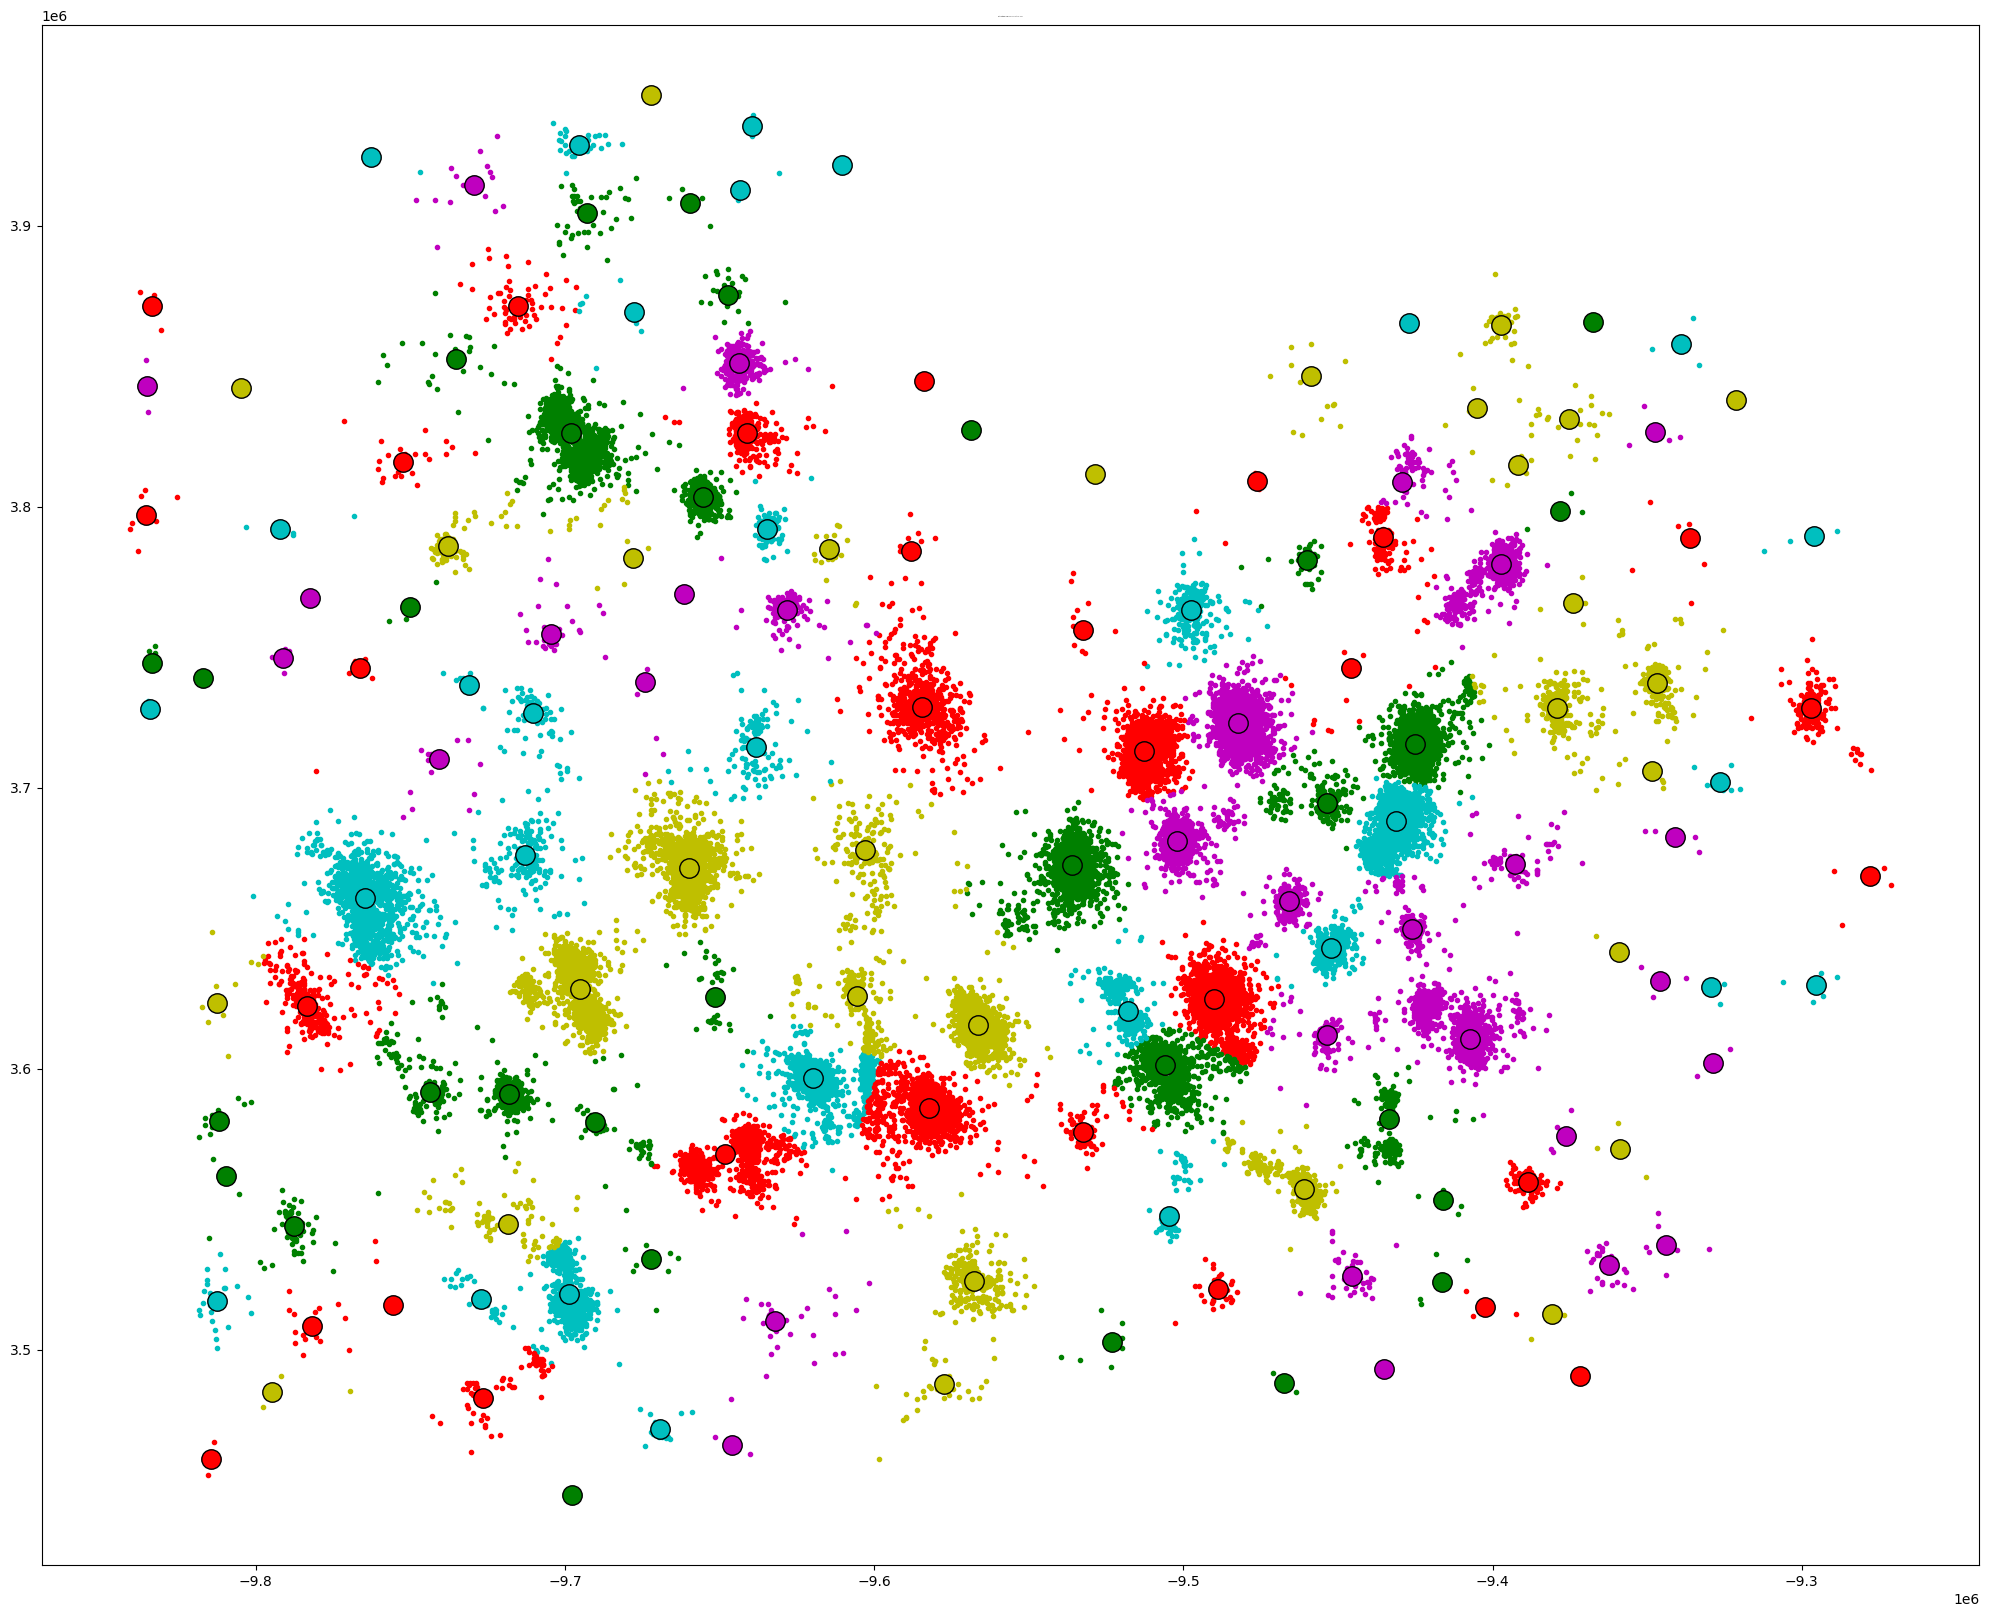

In [8]:
# Plot result
fig, ax = plt.subplots(figsize = [25,20])

#colors = cycle(sns.color_palette("husl", 8))
colors = cycle('grcmygrcmygrcmygrcmy')

for k, col in zip(range(n_clusters_-1), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], col + '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

#great_lakes.plot(ax=ax, color="cornflowerblue", edgecolor="slategrey", alpha=0.3)
#radar_buffers_cec.plot(ax = ax, alpha = 0.4, color="gray")

ax.set_title('Estimated number of clusters: %d' % n_clusters_, fontsize=1);

my_members = labels == -1
ax.plot(X[my_members, 0], X[my_members, 1], "b"+'.')

#plt.savefig("all_years.png", dpi=300)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X, labels))

In [9]:
print(len(labels))
print(len(firstpoints_aea))
#print(cluster_centers)
print(labels_unique)

56475
56475
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151]


In [10]:
df2 = firstpoints_aea.assign(cluster_ID=labels)
df2['cluster_center'] = df2['cluster_ID'].map(lambda x: cluster_centers[x])

In [11]:
from operator import itemgetter
 
def Extract(lst):
    return list( map(itemgetter(0), lst ))
def Extract_2(lst):
    return list( map(itemgetter(1), lst ))

df2['ctr_lon'] = Extract(df2['cluster_center'])
df2['ctr_lat'] = Extract_2(df2['cluster_center'])

print(df2)
df2.to_csv('../Data/3.1_firstdetections_clustered.csv', index=False)

             track_id                 filename  from_sunset  det_score  \
0      KDFX20000103-1      KDFX20000104_003402       38.735      0.281   
1      KDFX20000110-2      KDFX20000111_001036        9.944      0.056   
2      KDFX20000110-3      KDFX20000111_002217       21.628      0.751   
3      KDFX20000110-5      KDFX20000111_002806       27.444      0.113   
4      KDFX20000111-1      KDFX20000112_004340       42.207      0.795   
...               ...                      ...          ...        ...   
56470  KSJT20221114-5  KSJT20221115_001755_V06       34.118      0.284   
56471  KSJT20221124-5  KSJT20221125_000118_V06       21.504      0.191   
56472  KSJT20221127-8  KSJT20221128_001755_V06       38.764      0.592   
56473  KSJT20221208-3  KSJT20221209_000155_V06       22.873      0.079   
56474  KSJT20221213-5  KSJT20221214_000844_V06       28.581      0.138   

             x        y       r      lon     lat     radius  ...  \
0      265.408  198.481   8.933 -100.459  2